In [155]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import Ridge
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.neural_network import MLPRegressor

# def evaluate_regressors(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     X_train, valid_input, y_train, valid_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#     regressors = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),Ridge(),KNeighborsRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),MLPRegressor()]
#     model_names = ['Linear Regression', 'Random Forest', 'GradientBoostingRegressor', 'SVR', 'Ridge', 'KNeighborsRegressor', 'GradientBoostingRegressor', 'Decision Tree', 'MLPRegressor']
#     for i, regressor in enumerate(regressors):
#         regressor.fit(X_train, y_train)
#         y_pred = regressor.predict(X_test)
#         mse = mean_squared_error(y_test, y_pred)
#         print(f'{model_names[i]} \n MSE: {mse}')
#         print('score :', regressor.score(X_train, y_train))
#         print('test :', regressor.score(X_test, y_test))
#         scores = cross_validate(regressor, valid_input, valid_target)
#         print('corss_validate :', np.mean(scores['test_score']))
#         print('-' * 40)

# data = pd.read_csv('../Data/03.통합.csv')
# X = data.drop('target', axis=1)
# y = data['target']

# evaluate_regressors(X, y)

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [157]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

----
# Data Analysis - 04
### - ML 2nd Try

In [158]:
df = pd.read_csv("../Data/03.통합.csv", index_col='년도')
df

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2


In [159]:
# 총인구 컬럼 제거
df.drop(columns='총인구', inplace=True)
df.head()

,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,
2013,경기도,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,363224,19340,86,136309,9981,46578.5,37541.7


### k값 찾기

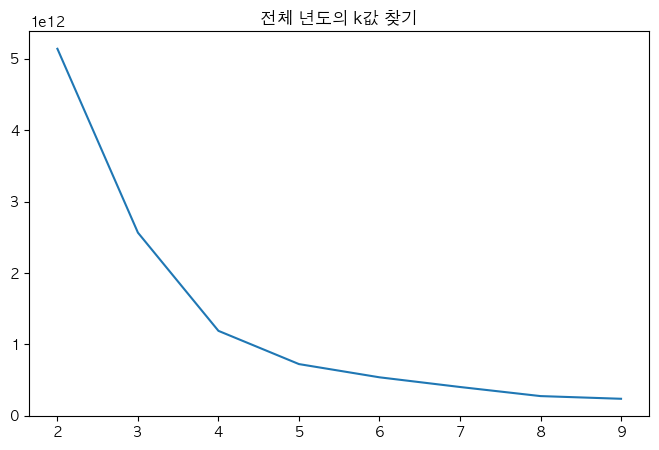

In [160]:
df_temp = df.copy()
df_temp.set_index('시도', inplace=True)
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
df_km = df_temp
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

> #### 후보: 3, 4, 5

----
### k값 적용(k=4) -> 데이터프레임 컬럼 추가

In [161]:
data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

# labels
print(km.labels_)
# 각 군집의 중심위치
km.cluster_centers_

[2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3
 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3
 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0
 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0]


array([[1.95049262e+05, 1.01237875e+04, 3.37125000e+01, 7.75759125e+04,
        5.29692500e+03, 2.30497900e+04, 3.85136163e+04],
       [1.61312862e+06, 6.88623750e+04, 3.90250000e+02, 4.37333375e+05,
        4.58475000e+04, 5.71485213e+05, 6.76193713e+05],
       [1.85165600e+06, 9.83292500e+04, 2.71375000e+02, 7.43822500e+05,
        5.25488750e+04, 3.22522750e+05, 2.05947125e+04],
       [4.03589850e+05, 2.07180750e+04, 6.76250000e+01, 1.51779725e+05,
        1.13792750e+04, 7.19181200e+04, 4.38354200e+04]])

In [162]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df_km['cluster_id'] = km.labels_
df_km

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,2
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,1
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,3
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,3
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...
충청북도,226441,8607,40,85135,6103,28669.1,27669.5,0
대전광역시,243418,7481,44,79807,6405,39341.3,38725.4,0
강원도,217897,7835,32,73478,5554,22831.4,23634.2,0


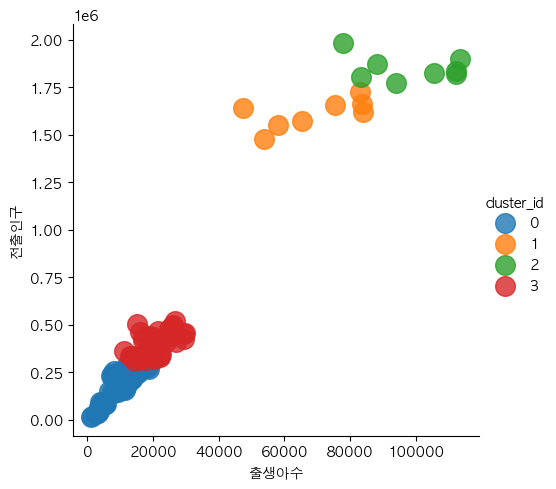

In [163]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

----
# Classification

### Feature, Target

In [164]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [165]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # random_state=42

In [166]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [167]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----

### 각 ML 별 Score 확인

In [168]:
# 각 ML별 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate

ml_list = [KNeighborsClassifier(n_neighbors=3), SVC(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]
for ml in ml_list:
    print("- ML :", ml)
    clf = ml
    # 학습
    clf.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", clf.score(sub_input, sub_target))
    print("+ Valid score :", clf.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(clf, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    print("-"*30)

- ML : KNeighborsClassifier(n_neighbors=3)
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : SVC()
+ Train score : 0.9302325581395349
+ Valid score : 0.9090909090909091
+ Test score : 0.9536796536796537
------------------------------
- ML : GaussianProcessClassifier()
+ Train score : 1.0
+ Valid score : 0.3181818181818182
+ Test score : 0.2961038961038961
------------------------------
- ML : DecisionTreeClassifier()
+ Train score : 1.0
+ Valid score : 0.9545454545454546
+ Test score : 0.9904761904761905
------------------------------
- ML : RandomForestClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
------------------------------
- ML : AdaBoostClassifier()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 0.9904761904761905
------------------------------
- ML : MLPClassifier()
+ Train score : 0.36046511627906974
+ Valid score : 0.36363636363636365
+ Test score : 0.3528138528138528
----------------------------

----
### 10번의 교차검증 실시

In [169]:
# 함수: 10번의 교차 검증 실시 => 정확도를 보기 위해서
from sklearn.model_selection import cross_val_score
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        score = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(score.mean())
    return cv_scores

In [170]:
# 각 Classifier 별 10번의 정확도 확인
ml_list = [KNeighborsClassifier(n_neighbors=3), SVC(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]
scores_list = []
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    scores_list.append(ml_cv_scores)
    print(ml_cv_scores)
ml_cv_scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547, 0.9545454545454547]
[0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363, 0.2963636363636363]
[0.990909090909091, 0.990909090909091, 0.99, 1.0, 1.0, 0.99, 0.9809090909090911, 0.99, 0.99, 0.990909090909091]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 1.0, 1.0, 0.99]
[0.28545454545454546, 0.2481818181818182, 0.31909090909090904, 0.39090909090909093, 0.3609090909090909, 0.3090909090909091, 0.2654545454545455, 0.40636363636363637, 0.44545454545454544, 0.4172727272727273]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.860909090909091, 0.860909090909091, 0.860909090909091, 0.8609090909

[0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091,
 0.860909090909091]

### 정확도 시각화

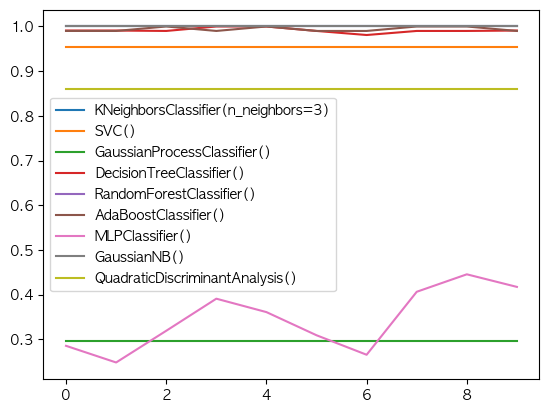

In [171]:
# 정확도 시각화
cv_list = {}
for ml, scores in zip(ml_list, scores_list):
    cv_list[ml] = scores
cv_list
df = pd.DataFrame(cv_list)
df.plot()
plt.show()

> ### Classfication 정확도가 높으므로 Regression으로 시도해보자

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

### cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환

In [172]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

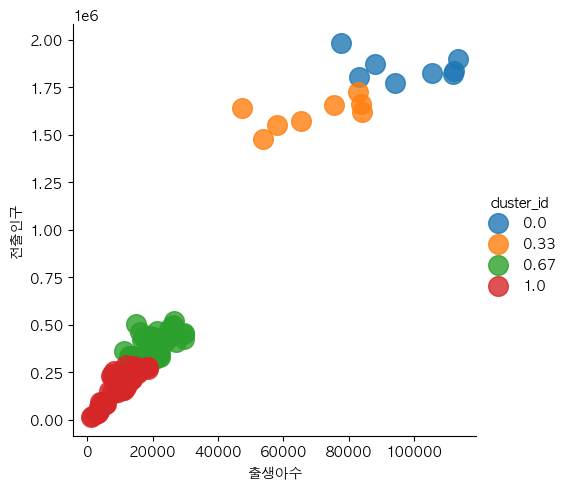

In [173]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

In [174]:
df_km.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,0.67
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,0.67
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,0.67


In [175]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [176]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [177]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [178]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----

### 각 ML 별 Score 확인

In [179]:
# 각 ML별 import
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

# ml_list = [KNeighborsRegressor(n_neighbors=3), SVC(), GaussianProcessRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor(), GaussianNB(), QuadraticDiscriminantAnalysis()]
# ml_list = [GaussianProcessRegressor(), LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor()]
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
for ml in ml_list:
    print("- ML Name :", ml)
    reg = ml
    # 학습
    reg.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", reg.score(sub_input, sub_target))
    print("+ Valid score :", reg.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(reg, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    # 평균 절대값 오차
    test_prediction = ml.predict(test_input)
    mae = mean_absolute_error(test_target, test_prediction)
    print("+ Mean Absolute Error :", mae)
    print("-"*40)

- ML Name : LinearRegression()
+ Train score : 0.8789847250143812
+ Valid score : 0.8541065724777201
+ Test score : 0.8138599160481272
+ Mean Absolute Error : 0.09569501301011948
----------------------------------------
- ML Name : DecisionTreeRegressor()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
+ Mean Absolute Error : 0.011785714285714285
----------------------------------------
- ML Name : RandomForestRegressor()
+ Train score : 0.9996176616662557
+ Valid score : 0.9990750781247627
+ Test score : 0.9957750326979269
+ Mean Absolute Error : 0.007878571428571934
----------------------------------------


----
### 10번의 교차검증 실시

In [180]:
# 함수: 10번의 교차 검증 실시 => 정확도를 보기 위해서
from sklearn.model_selection import cross_val_score
def cross_validation(regressor, features, labels):
    cv_scores = []
    for i in range(10):
        # score = cross_val_score(regressor, features, labels, cv=10, scoring='accuracy')
        score = cross_val_score(regressor, features, labels, cv=10)
        cv_scores.append(score.mean())
    return cv_scores

### 정확도 시각화

In [181]:
# 각 Regressor 별 10번의 정확도 확인
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
scores_list = []
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    scores_list.append(ml_cv_scores)
    print("-",ml,':', ml_cv_scores)
    print("-------------")

- LinearRegression() : [0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567, 0.7150600265114567]
-------------
- DecisionTreeRegressor() : [0.9919845029709331, 0.9919845029709331, 0.9919845029709331, 1.0, 0.9907174074762878, 0.9907174074762878, 1.0, 0.9919845029709331, 0.9850305243884208, 1.0]
-------------
- RandomForestRegressor() : [0.9971275234828987, 0.9964971085266644, 0.9969783993410836, 0.9974172788527065, 0.9971004442040045, 0.9965896782663035, 0.9970440478201799, 0.9962399203377824, 0.9968314492064752, 0.9961639864857037]
-------------
- AdaBoostRegressor() : [0.970132382458714, 0.9879813384167754, 0.9323016583078786, 0.9633333333333333, 0.9919845029709331, 0.8819845029709331, 0.982701910447221, 0.9759535089127992, 0.9277141482706581, 1.0]
-------------


### 정확도 시각화

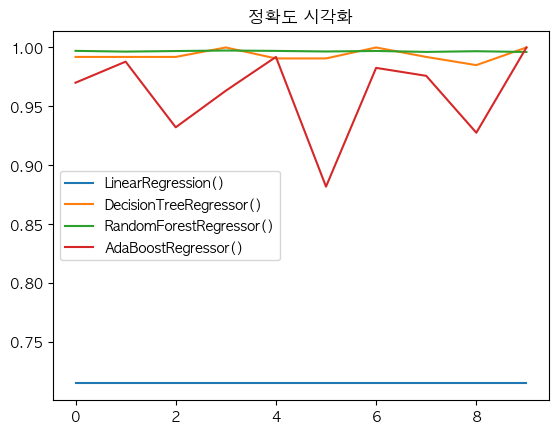

In [182]:
# 정확도 시각화
cv_list = {}
for ml, scores in zip(ml_list, scores_list):
    cv_list[ml] = scores
cv_list
df = pd.DataFrame(cv_list)
df.plot()
plt.title('정확도 시각화')
plt.show()

----
## 주성분 분석

In [196]:
df_km.head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,0.67
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,0.67
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,0.67


In [192]:
df_km.iloc[:,:7].head()

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
시도,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2
경상남도,423864,29504,65,190166,12612,57288.6,6703.3
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7


In [201]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 300개의 데이터중 구별이 확실한 주성분 50개를 선택
pca.fit(df_km.iloc[:,:7])

PCA(n_components=1)

In [202]:
pca.components_.shape # sample 50개만 들어가있다 # 50개가 뭔지 그래프로 그려보자

(1, 7)

In [219]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(df_km.iloc[:,:7].shape)
km_pca = pca.transform(df_km.iloc[:,:7])
print(km_pca.shape)
km_pca.tolist()

(136, 7)
(136, 1)


[[1461496.6053557042],
 [1335523.3980840684],
 [-21499.685120253256],
 [48554.619946023704],
 [-90677.33277128213],
 [-11967.951863114808],
 [-202882.65031570397],
 [-124853.04597130482],
 [-233393.72684204645],
 [-191113.65766252187],
 [-217334.73036680432],
 [-308946.21444305725],
 [-251728.65591529707],
 [-231812.62989439396],
 [-253436.99813741478],
 [-392086.7610225833],
 [-438709.05112283636],
 [1476221.8015790004],
 [1382094.8614631298],
 [8217.728057277318],
 [54317.85124157891],
 [-87369.43942466925],
 [-8029.971704816876],
 [-188229.84168157633],
 [-118440.35398723271],
 [-218515.82588623735],
 [-179948.90399312833],
 [-204975.17174466825],
 [-294193.96117766015],
 [-251163.58449222386],
 [-215456.9328223926],
 [-243625.48404264916],
 [-391552.4040528334],
 [-429318.8357291578],
 [1538384.9265640292],
 [1452267.9311732913],
 [4549.4931579903105],
 [74524.69530707749],
 [-86468.60793889222],
 [11950.383225570666],
 [-199002.68473462257],
 [-111079.8953816059],
 [-228708.679388

In [222]:
km_pca.tolist()

[[1461496.6053557042],
 [1335523.3980840684],
 [-21499.685120253256],
 [48554.619946023704],
 [-90677.33277128213],
 [-11967.951863114808],
 [-202882.65031570397],
 [-124853.04597130482],
 [-233393.72684204645],
 [-191113.65766252187],
 [-217334.73036680432],
 [-308946.21444305725],
 [-251728.65591529707],
 [-231812.62989439396],
 [-253436.99813741478],
 [-392086.7610225833],
 [-438709.05112283636],
 [1476221.8015790004],
 [1382094.8614631298],
 [8217.728057277318],
 [54317.85124157891],
 [-87369.43942466925],
 [-8029.971704816876],
 [-188229.84168157633],
 [-118440.35398723271],
 [-218515.82588623735],
 [-179948.90399312833],
 [-204975.17174466825],
 [-294193.96117766015],
 [-251163.58449222386],
 [-215456.9328223926],
 [-243625.48404264916],
 [-391552.4040528334],
 [-429318.8357291578],
 [1538384.9265640292],
 [1452267.9311732913],
 [4549.4931579903105],
 [74524.69530707749],
 [-86468.60793889222],
 [11950.383225570666],
 [-199002.68473462257],
 [-111079.8953816059],
 [-228708.679388

In [206]:
df_km_pca = pd.DataFrame(km_pca.tolist())
df_km_pca

,0
0,1.461497e+06
1,1.335523e+06
2,-2.149969e+04
3,4.855462e+04
4,-9.067733e+04
...,...
131,-2.365044e+05
132,-2.183676e+05
133,-2.499221e+05
134,-3.737817e+05


In [212]:
df_km_pca = df_km['cluster_id']
df_km_pca

시도
경기도        0.00
서울특별시      0.33
경상남도       0.67
부산광역시      0.67
대구광역시      0.67
           ... 
충청북도       1.00
대전광역시      1.00
강원도        1.00
제주특별자치도    1.00
세종특별자치시    1.00
Name: cluster_id, Length: 136, dtype: float64

In [220]:
df_km_pca['principal_col'] = km_pca.tolist()
df_km_pca

시도
경기도                                                            0.0
서울특별시                                                         0.33
경상남도                                                          0.67
부산광역시                                                         0.67
대구광역시                                                         0.67
                                       ...                        
대전광역시                                                          1.0
강원도                                                            1.0
제주특별자치도                                                        1.0
세종특별자치시                                                        1.0
principal_col    [[1461496.6053557042], [1335523.3980840684], [...
Name: cluster_id, Length: 137, dtype: object

In [185]:
---------------------------
asdf

NameError: name 'asdf' is not defined

In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

### 산점도 그려보기

ValueError: x and y must be the same size

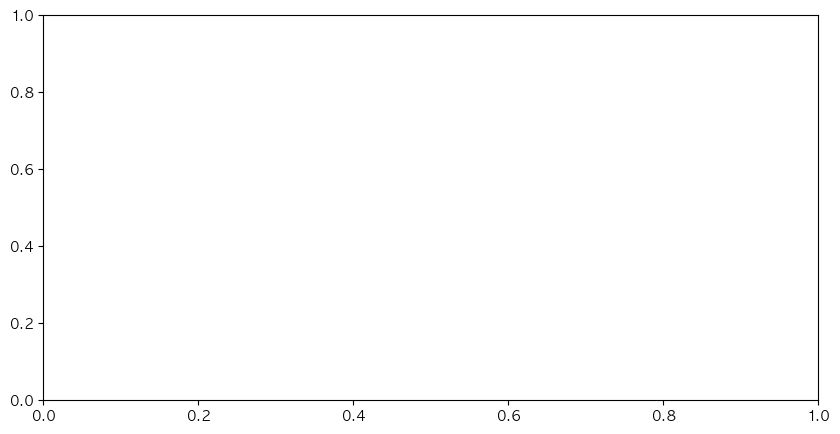

In [ ]:
# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_], c='red')

# 50cm 생선
plt.scatter(50, 1241.8, marker='^')

plt.show()

In [ ]:
ml_list = [GaussianProcessRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor()]
for ml in ml_list:
    ml_cv_scores = cross_validation(ml, train_input, train_target)
    print(ml_cv_scores)
ml_cv_scores

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

----
----
----
----
----
----

----
### Decision Model

In [ ]:
# 모델 tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 0.9545454545454546


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00073981, 0.00046682, 0.00039816, 0.00031996, 0.00032496]),
 'score_time': array([0.00040483, 0.0002811 , 0.00019503, 0.00017881, 0.00017095]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [ ]:
dt.predict(train_input)

array([0, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 1, 1, 2, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3,
       0, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1,
       3, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 1, 0, 1, 2],
      dtype=int32)

----
### Random Forest

In [ ]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.04317784, 0.03798604, 0.03801394, 0.0378592 , 0.04014325]),
 'score_time': array([0.00655007, 0.00646925, 0.00697088, 0.00694203, 0.00744295]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [ ]:
rf.predict(test_input)

array([1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 0, 1, 3, 1, 1, 1,
       1, 2, 3, 1, 3, 3], dtype=int32)

> ## Classfication 정확도가 높으므로 Regression으로 시도해보자

In [ ]:
# # KNN
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(train_input, train_target)
# clf.score(test_input, test_target)

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

### cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환

In [ ]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

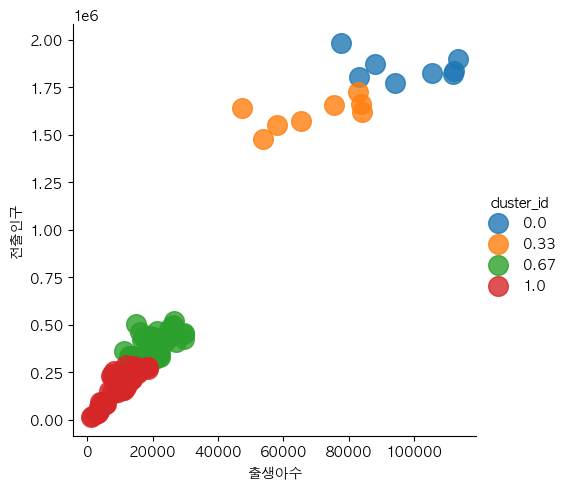

In [ ]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

In [ ]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [ ]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [ ]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----
### Decision Model

In [ ]:
# 모델 tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00137115, 0.00087714, 0.00036788, 0.00030088, 0.00050712]),
 'score_time': array([0.00027394, 0.00030494, 0.00016189, 0.00016284, 0.00018001]),
 'test_score': array([0.94774244, 0.95286688, 1.        , 1.        , 1.        ])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9801218646387161

In [ ]:
dt.predict(train_input)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.67, 0.67, 1.  , 0.67, 1.  , 0.67,
       1.  , 0.67, 0.67, 1.  , 0.67, 1.  , 0.33, 0.  , 0.  , 1.  , 1.  ,
       1.  , 1.  , 0.  , 1.  , 0.67, 1.  , 0.  , 1.  , 1.  , 1.  , 0.33,
       1.  , 0.67, 1.  , 1.  , 0.67, 0.67, 1.  , 0.33, 1.  , 1.  , 0.67,
       1.  , 1.  , 0.67, 0.67, 0.67, 0.67, 1.  , 0.33, 1.  , 1.  , 0.67,
       1.  , 0.33, 0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 1.  , 0.67,
       1.  , 1.  , 1.  , 0.67, 0.67, 1.  , 1.  , 1.  , 0.67, 0.  , 1.  ,
       0.67, 1.  , 1.  , 1.  , 0.67, 1.  , 0.67, 0.67, 0.67, 1.  , 0.67,
       1.  , 0.33, 0.67, 1.  , 1.  , 1.  , 0.67, 0.67, 0.67, 1.  , 0.67,
       0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 0.  , 0.67])

----
### Random Forest

In [ ]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 0.9990279478260747
Valid score : 0.9982068083323835


In [ ]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.04407716, 0.03859782, 0.03933501, 0.03601933, 0.03644705]),
 'score_time': array([0.00625896, 0.00579906, 0.00585699, 0.00518894, 0.00509214]),
 'test_score': array([0.99352798, 0.99119082, 0.99060723, 0.99356399, 0.99740895])}

In [ ]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9932597929507022

In [ ]:
rf.predict(test_input)

array([0.0066, 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 0.9538,
       1.    , 1.    , 0.9934, 1.    , 1.    , 1.    , 0.2871, 0.67  ,
       1.    , 0.67  , 1.    , 1.    , 0.9967, 0.9967, 0.3236, 1.    ,
       1.    , 0.    , 1.    , 0.67  ])

In [ ]:
test_input

array([[1.871621e+06, 8.817500e+04, 2.680000e+02, 7.524990e+05,
        4.936400e+04, 3.505536e+05, 2.368040e+04],
       [1.522280e+05, 7.539000e+03, 3.300000e+01, 6.851200e+04,
        3.486000e+03, 2.849510e+04, 1.664630e+04],
       [2.088310e+05, 9.333000e+03, 4.000000e+01, 8.670900e+04,
        5.918000e+03, 2.639990e+04, 2.555550e+04],
       [9.219300e+04, 5.494000e+03, 2.100000e+01, 3.827200e+04,
        2.886000e+03, 1.254820e+04, 5.708100e+03],
       [1.510900e+04, 1.111000e+03, 2.000000e+00, 7.090000e+03,
        4.260000e+02, 2.429100e+03, 1.441735e+05],
       [2.262840e+05, 1.066200e+04, 3.200000e+01, 8.045800e+04,
        5.432000e+03, 1.418470e+04, 1.512430e+04],
       [2.483970e+05, 1.396200e+04, 5.000000e+01, 9.159900e+04,
        7.085000e+03, 2.580470e+04, 2.569250e+04],
       [2.769000e+05, 1.423100e+04, 5.400000e+01, 1.018600e+05,
        7.545000e+03, 2.462590e+04, 1.730330e+04],
       [2.526070e+05, 1.269800e+04, 5.200000e+01, 9.789500e+04,
        7.233000

In [ ]:
rf.predict([[3.131880e+05, 6.773700e+04, 2.650000e+02, 7.617310e+05,
       6.314500e+04, 4.198318e+05, 2.493950e+04]])

array([0.1563])

In [ ]:
# # RandomForest
# from sklearn.model_selection import cross_validate
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_jobs=-1, random_state=42) # default:100
# scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) # 크로스밸리데이션 쓰려면 모델부터 만들어놔야한다 # return_train_score=True > 그래야 점수를 알 수 있다.
# print(np.mean(scores['train_score']), np.mean(scores['test_score']))

----
----
### KFold를 이용한 방법

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# splitter = StratifiedKFold() # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [ ]:
# np.mean(scores['test_score'])

In [ ]:
# # KFold의 Fold 중 10개로 나누어서 교차검증
# splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [ ]:
# np.mean(scores['test_score'])

> 0.963 (n_splits=10)